## Chapter 1.2.3. - *Validating data and data generation approaches*

The final issue in data sourcing we'll be discussing is the validation of data and its associated dataset generation approach: 

### ***DISCUSSION 1:***

* A data generation approach is simply the methodology used to collect and compute a given data resource. In a way, this topic is best described as a data sourcing meta-issue since: 

  * Validating either data itself and/or its generation approach can lend additional credence to a data source (helping you to decide between multiple data authors); and 

  * Understanding which data generation approach was used and why can be informative as to research incentives and intended purpose. 

* And just like understanding data author incentives and intended purpose, grappling with this issue can be thought of answering two questions: 

  * Does the approach this researcher, agency, etc. uses to compute this metric or dataset commonly accepted and reasonable? 

  * If it is, does this data author provide the necessary data resources and instructions for you to re-generate the associated dataset? (If you do, does your dataset match theirs?) 

To better understand this topic, let's explore it in the context of GDP data! 

### ***DISCUSSION 2:***
GDP can be measured in [three different ways](https://www.imf.org/external/pubs/ft/fandd/basics/gdp.htm#:~:text=Theoretically%2C%20GDP%20can%20be%20viewed%20in%20three%20different%20ways%3A): 

* The *production approach* sums the value-added at each stage of production for all goods and services (where value-added is defined as the sales value minus the value of intermediate inputs);

* The *expenditure approach* sums the value of all purchases made by final users (i.e., the consumption of households, the investment of companies, and the purchases of goods and services by goverment entities and foreign consumers).

* The *income approach* sums all of the incomes generated by production (including but not limited to the compensation employees receive and the operating surplus of companies).

In *theory*, each of these approaches should generate the same GDP figures/data: 

* Consider the expenditure and income approaches - in a simplified economy with  consumers and businesses, every dollar a consumer receives as income (income approach) will be accounted for as a dollar spent on a good or service from some business (expenditure approach). 
  
* This relationship is neatly captured in a diagram shown in introductory economics classes across the world, the circular flow diagram: 

    <div>
    <img src="../imgs/circularflow.png" width="400"/>
    <div> 

The BEA publishes official GDP data using the [expenditure approach](https://www.bea.gov/resources/methodologies/measuring-the-economy) (see Page 4, Section "Income"), but also measures and releases GDP figures generated using the income approach as GDI (**G**ross **D**omestic **I**ncome) data. Let's see how the theoretical 1:1 relationship holds up in practice (data from [FRED](https://fred.stlouisfed.org/series/GDI)):

### ***CODING EXERCISE:***

In [1]:
# required imports: 
import os                           # use: file management and access 
import numpy as np                  # use: some calculations
import pandas as pd                 # use: data intake and manipulation 
import matplotlib.pyplot as plt     # use: data viz. 

In [2]:
""" DATA SOURCING: DATA GENERATION APPROACHES """
# importing the data (index column has year values): 
datasets_dir = os.path.dirname(os.getcwd()) + os.sep + 'sample_datasets' + os.sep 
gdp_approaches_data = pd.read_csv(datasets_dir + 'gdp_diff_approaches.csv' , encoding='utf-8')

# let's take a subset of the data:
gdp_approaches_data = gdp_approaches_data.tail(15)

# data structure: index, date, gdp, gdi (billions of nominal dollars)
print(gdp_approaches_data.tail(10))

          date        gdp        gdi
292   1/1/2020  21481.367  21755.875
293   4/1/2020  19477.444  19620.204
294   7/1/2020  21138.574  20908.535
295  10/1/2020  21477.597  21972.571
296   1/1/2021  22038.226  22547.899
297   4/1/2021  22740.959  23132.650
298   7/1/2021  23202.344  23833.203
299  10/1/2021  24002.815  24619.857
300   1/1/2022  24386.734  25223.141
301   4/1/2022  24882.878  25860.059


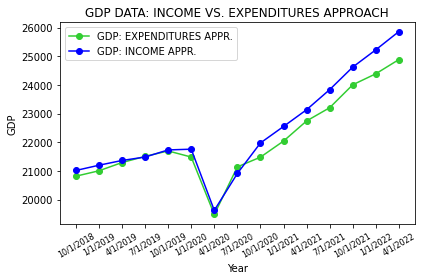

In [3]:
# scatter plots of the data: 
plt.plot(gdp_approaches_data['date'], gdp_approaches_data['gdp'], linestyle='-', marker='o', label='GDP: EXPENDITURES APPR.', color='limegreen')
plt.plot(gdp_approaches_data['date'], gdp_approaches_data['gdi'], linestyle='-', marker='o', label='GDP: INCOME APPR.', color='blue')

# formatting options: 
plt.title("GDP DATA: INCOME VS. EXPENDITURES APPROACH")
plt.xlabel("Year"), plt.ylabel("GDP")
plt.xticks(rotation = 30, fontsize = 8)
plt.legend(loc='upper left')
plt.tight_layout()

The two approaches seem to generate reasonably similar figures, but let's get a better picture of just the differences in measurements over time: 

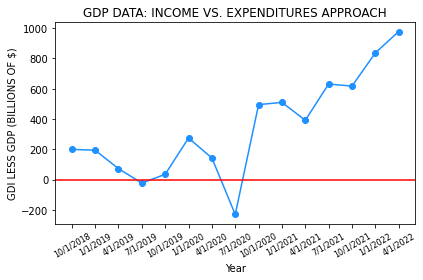

In [4]:
# compute the diff: 
gdp_approaches_data['gdp_diff'] = gdp_approaches_data['gdi'] - gdp_approaches_data['gdp']

# plot the diff: 
plt.plot(gdp_approaches_data['date'], gdp_approaches_data['gdp_diff'], linestyle='-', marker='o', color='dodgerblue')

# formatting options: 
plt.title("GDP DATA: INCOME VS. EXPENDITURES APPROACH")
plt.xlabel("Year"), plt.ylabel("GDI LESS GDP (BILLIONS OF $)")
plt.xticks(rotation = 30, fontsize = 8)
plt.axhline(y=0, color='red', linestyle='-')
plt.tight_layout()

As we can see, for the past 7 fiscal quarters, GDI has consisently been measured as ~500+ billion dollars *greater* than GDP. Why is this? In the case of GDP, the disparity between the measurements resulting from different approaches is generally the product of multiple factors: 

* Meta-issues like differences in the accuracy and timeliness of contributing data resources can give rise to meaningful differences.  

* Structural differences in how the approaches operate can also contribute to the divergence: 
  
  * For instance, if an individual saves a portion of their income in cash, the value of these savings are reflected in the income approach data but not the expenditure approach data for the same year.

  * Individuals might save their income as inflation appears to be rising (as an inflationary hedge) and/or as economic conditions appear to worsen - [does this sound familiar](https://fortune.com/2021/12/03/inflation-no-longer-transitory-higher-prices-fed-chair-powell-treasury-yellen/)? 

### ***DISCUSSION 3:***

Thus, in *practice*, GDP measurements (and data more generally) generated through different approaches can differ substantially. 

* And, while a real-life example is not readily available, one could imagine how selectively using GDP data generated by different approaches could be a means to exaggerate an economic conclusion: 

  * For example, a researcher could use expenditure-approach GDP data during a period of economic recession (where there is typically deflated consumer expenditure and increased savings) and then use income-approach GDP data during the post-recession years (where there is typically an influx of expenditures purchased using saved cash) to depict stronger-than-actual economic recovery. <br></br>
  
* Still, it's important to note that, while GDP as measured by the expenditure approach is more commonly used, both GDP and GDI are well-established measures. In any research scenario where multiple approaches to data generation or collection exist, if the sources are similarly reputable, you should seek appropriate justification for the approach(es) used.

### ***CONCLUSION:***

As a final note, when a data generation approach is offered, you can also attempt to generate a data resource yourself: 

* While this practice is likely one of the strongest forms of data validation possible, it also is limited by varying degrees of applicablity; your ability to do so is contingent on the availability of the supporting/underlying datasets - e.g., you likely wouldn't be able to attempt this practice for a behavioral experiment, a mass measurement project like GDP, etc. 

* Also, this practice is not at all necessary to conduct good, grounded research. It can be particularly valuable when you wish to co-opt a methodology or dataset that is relatively new in a field, but even then is not a requisite depending on the rigorousness of the original datasource. 

Ultimately, data and data generation approach validation are like the dessert of the data sourcing meal - not essential, but it certainly helps round things out!